### Is there anybody who doesn't like Pokemons?  

I think, nope, because we all love them! So let's conduct a small research for pocket monsters' better understand.

As usual, we start with import libs and data.

In [1]:
import numpy as np
import pandas as pd 
import re

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.style as style

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from matplotlib.colors import ListedColormap
from matplotlib import cm

from pandas_profiling import ProfileReport

In [2]:
pokemons = pd.read_csv('/kaggle/input/pokemon/Pokemon.csv')

One of my favourite tools is ProfileReport, which helps us to describe and visualise the most prevalent information about dataset easily.  
Moreover, it also shows us all correlations, max and min values for all features, indicates missing values.  
We will use "minimal' mode to reduce iteration time and memory consuming.

In [3]:
pro_rep = ProfileReport(pokemons,minimal=True)

In [4]:
pro_rep.to_widgets()

As you can see, you don't need any command to describe data anymore.
Oh, it was a joke. Try to work a traditional way.

In [5]:
display(pokemons.describe())
display(pokemons.info())
display(pokemons.head())

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


None

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### A touch of preprocessing 

We have got 386 missing values in Type 2 column, fill in with 'none' values.

In [6]:
pokemons['Type 2'].fillna(value='None', inplace=True)

Combine two types in one feature.

In [7]:
pokemons['Types'] = pokemons['Type 1'] + '_' + pokemons['Type 2']

### Analisys and Visualisation

Just imagine, eight hundred poket-monsters are waiting for us. Let's start with types.  
We will drop all missing values in Type 2.

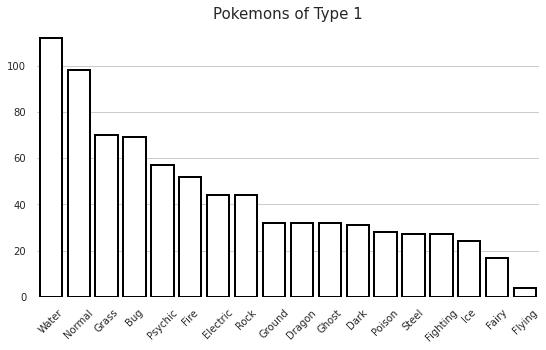

In [8]:
temp_1 = pokemons['Type 1'].value_counts().reset_index()

sns.set_style('whitegrid')

plt.figure(figsize=(9,5))
sns.barplot(y=temp_1['Type 1'], x=temp_1['index'], facecolor='white', linewidth=2, edgecolor='black')


plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Pokemons of Type 1', size=15);

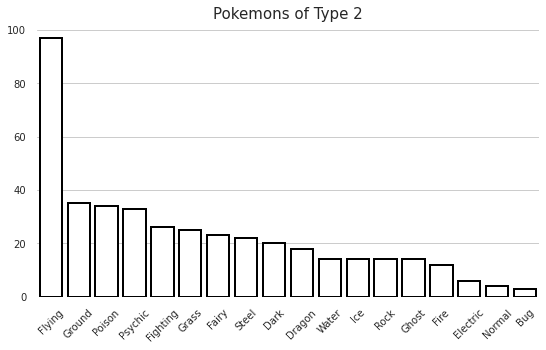

In [9]:
temp_2 = pokemons['Type 2'].value_counts().reset_index().drop(0)

plt.figure(figsize=(9,5))
sns.barplot(y=temp_2['Type 2'], x=temp_2['index'], facecolor='white', linewidth=2, edgecolor='black')


plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Pokemons of Type 2', size=15);

#### What if somebody loves pies more than bars? It has the same shape as poketball does.

In [10]:
c_map_grey = ['rgb(220, 220, 220)','rgb(222, 222, 222)','rgb(224, 224, 224)',
      'rgb(226, 226, 226))','rgb(228, 228, 228)','rgb(230, 230, 230',
      'rgb(232, 232, 232)','rgb(234, 234, 234)','rgb(236, 236, 236)',
      'rgb(238, 238, 238)','rgb(240, 240, 240)','rgb(242, 242, 242)',
      'rgb(244, 244, 244)','rgb(246, 246, 246)','rgb(248, 248, 248)',
      'rgb(250, 250, 250)','rgb(252, 252, 252)','rgb(254, 254, 254)']

In [11]:
fig = go.Figure(data=[go.Pie(labels=temp_1['index'], values=temp_1['Type 1'], 
                             textinfo='label+percent',insidetextorientation='radial', marker_colors=c_map_grey
                            )])

fig.update_traces(textposition='inside',
                  marker=dict(line=dict(color='darkgrey', width=0.3)))
fig.update_layout(title_text='Pokemon types pie-chart distribution', title_x=0.5)
fig.show()

5 most crowded types are: Water, Normal, Grass, Bugs and Psychic. 

#### Distribution of 'Total' metric between different Types 1.

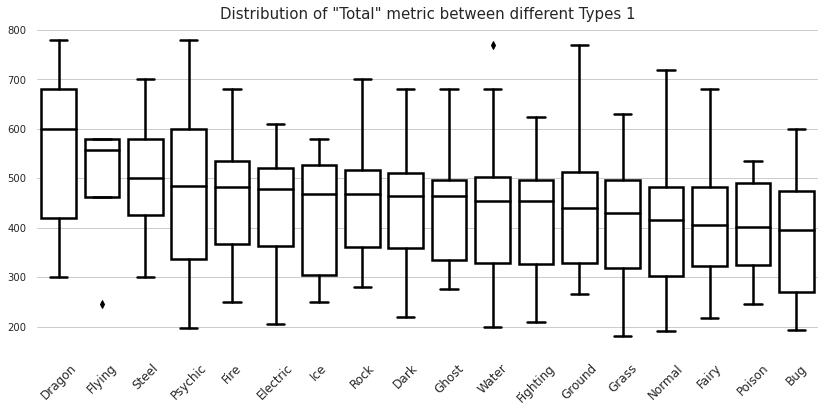

In [12]:
temp_3 = pokemons[['Type 1', 'Total']].groupby('Type 1', as_index=False).median().sort_values(by='Total', ascending=False)

plt.figure(figsize=(14,6))

ax = sns.boxplot(x=pokemons['Type 1'], y=pokemons['Total'], linewidth=2.5,order=temp_3['Type 1'])

for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    
    for j in range(6*i,6*(i+1)):
        ax.lines[j].set_color('black')
        ax.lines[j].set_mfc('black')
        ax.lines[j].set_mec('black')
            

plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of "Total" metric between different Types 1', size=15)
plt.xticks(rotation=45, size=12);

#### What type of Pokemon has the best median Total metric.

In [13]:
best_total = (pokemons[['Types','Total']].groupby('Types')
              .median().sort_values(by='Total', ascending=False)
              .head(10).style.background_gradient(cmap='binary'))
              
best_total 

,Total
Types,
Ground_Fire,770.000000
Dragon_Ice,700.000000
Steel_Dragon,680.000000
Psychic_Dark,680.000000
Ghost_Dragon,680.000000
Dragon_Fire,680.000000
Dragon_Electric,680.000000
Rock_Dark,650.000000
Dragon_Psychic,650.000000


Dragons are fantastic: literally, they are the most reliable type of all pokemon! To ask them to show all the power,  just shout out 'Dracarys'.  
Oh, wait, this one is from another Universe.

#### Which pokemon are legendary and how many of them are in total monster population?

In [14]:
temp_legendary = pokemons['Legendary'].value_counts().reset_index()
temp_legendary['index'].replace(True,'Legendary',inplace=True)
temp_legendary['index'].replace(False,'Common',inplace=True)

In [15]:
fig = px.pie(values=temp_legendary['Legendary'],
             names=temp_legendary['index'],
             color_discrete_sequence=px.colors.sequential.Greys)

fig.update_traces(textinfo="value+percent+label",
                  textfont_size=10,
                  marker=dict(line=dict(color='darkgrey', width=2)))

fig.update_layout(title_text='Percentage of rare pokemon', title_x=0.5)
fig.show()

Only eight percents of Pokemons are Legendary. Discover them better.

In [16]:
legendary = pokemons.query('Legendary == True')
legendary

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Types
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,Ice_Flying
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,Electric_Flying
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,Fire_Flying
162,150,Mewtwo,Psychic,None,680,106,110,90,154,90,130,1,True,Psychic_None
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,Psychic_Fighting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,Rock_Fairy
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,Rock_Fairy
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,Psychic_Ghost
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,Psychic_Dark


As we can see, all these pokemons have very high 'Total' values. It means, they are really strong!  



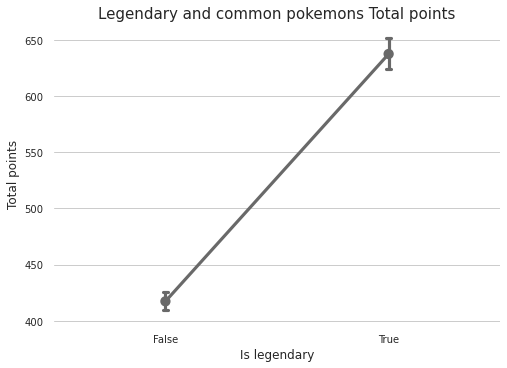

In [17]:
sns.pointplot(x="Legendary", y="Total", data=pokemons, capsize=0.02, color='dimgrey')

plt.xlabel('Is legendary', size=12)
plt.ylabel('Total points', size=12)
plt.title('Legendary and common pokemons Total points', size=15);

Commonly, Legendary pokemon have more than 200 total points advantage.

#### Is there the same amount of legendary pet in each generation?

In [18]:
temp = pokemons[['Name', 'Legendary','Generation']].groupby(['Generation','Legendary'], as_index=False).count()

In [19]:
temp

,Generation,Legendary,Name
0,1,False,160
1,1,True,6
2,2,False,101
3,2,True,5
4,3,False,142
5,3,True,18
6,4,False,108
7,4,True,13
8,5,False,150
9,5,True,15


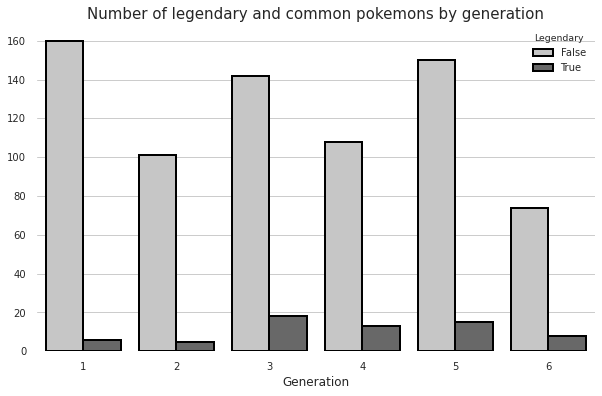

In [20]:
plt.figure(figsize=(10,6))

sns.barplot(data=temp, x='Generation', y='Name', hue='Legendary', 
            palette='Greys', linewidth=2, edgecolor='black')

plt.title('Number of legendary and common pokemons by generation', size=15)
plt.xlabel('Generation', size=12)
plt.ylabel('');

The Third generations brought us the biggest number of legendary pets.  
In the end of the series, there were the lowest number of new pokemons.  

### Non legendary pokemons  

It's time to explore average and common monsters.

In [21]:
common = pokemons.query('Legendary == False').reset_index(drop=True)


#### Top 5 strongest pokemon

In [22]:
common[['Name', 'Total']].sort_values(by='Total', ascending=False).head()

,Name,Total
402,MetagrossMega Metagross,700
465,GarchompMega Garchomp,700
398,SalamenceMega Salamence,700
259,TyranitarMega Tyranitar,700
302,Slaking,670


Try to remove all 'Mega'-evolving forms.

In [23]:
forms = []

for i in range(len(common)):
    
    name = common.loc[i,'Name']
    mega = re.findall('Mega', name)

    if mega == ['Mega']:
        forms.append(True)
    else:
        forms.append(False)

Forms = pd.Series(forms, name='Is_mega')

common = common.join(Forms)

common.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Types,Is_mega
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass_Poison,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass_Poison,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass_Poison,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass_Poison,True
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False,Fire_None,False


In [24]:
common.query('Is_mega == False')[['Name', 'Total']].sort_values(by='Total', ascending=False).head()

,Name,Total
302,Slaking,670
159,Mew,600
397,Salamence,600
508,Cresselia,600
464,Garchomp,600


The most powerful pokemon without 'Mega' form looks nice.

![image](https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fdavidthier%2Ffiles%2F2017%2F12%2F800px-Sawyer_Slaking.jpg)

#### Top 5 weakest pokemon 

In [25]:
common.query('Is_mega == False')[['Name', 'Total', 'Types']].sort_values(by='Total').head()

,Name,Total,Types
200,Sunkern,180,Grass_None
311,Azurill,190,Normal_Fairy
417,Kricketot,194,Bug_None
277,Wurmple,195,Bug_None
13,Caterpie,195,Bug_None


Oh, poor Sunkern, your belonging to a Grass type gives you nothing.

![image](https://cdn.bulbagarden.net/upload/thumb/9/95/191Sunkern.png/600px-191Sunkern.png)

#### Attack, defence, hp and speed points distribution.

Is there any difference between basic stats distribution in top 5 biggest pokemon types?

In [26]:
biggest_classes = common['Type 1'].value_counts().head().index.tolist()
biggest_classes

['Water', 'Normal', 'Bug', 'Grass', 'Fire']

In [27]:
### Create the data for analysis

hist_data_1 = [
            common.loc[common['Type 1'] == "Water"]['Attack'], 
            common.loc[common['Type 1'] == "Water"]['Defense'], 
            common.loc[common['Type 1'] == "Water"]['Speed'], 
            common.loc[common['Type 1'] == "Water"]['HP']]

hist_data_2 = [
            common.loc[common['Type 1'] == "Normal"]['Attack'], 
            common.loc[common['Type 1'] == "Normal"]['Defense'], 
            common.loc[common['Type 1'] == "Normal"]['Speed'], 
            common.loc[common['Type 1'] == "Normal"]['HP']]

hist_data_3 = [
            common.loc[common['Type 1'] == "Bug"]['Attack'], 
            common.loc[common['Type 1'] == "Bug"]['Defense'], 
            common.loc[common['Type 1'] == "Bug"]['Speed'], 
            common.loc[common['Type 1'] == "Bug"]['HP']]

hist_data_4 = [
            common.loc[common['Type 1'] == "Grass"]['Attack'], 
            common.loc[common['Type 1'] == "Grass"]['Defense'], 
            common.loc[common['Type 1'] == "Grass"]['Speed'], 
            common.loc[common['Type 1'] == "Grass"]['HP']]

hist_data_5 = [
            common.loc[common['Type 1'] == "Fire"]['Attack'], 
            common.loc[common['Type 1'] == "Fire"]['Defense'], 
            common.loc[common['Type 1'] == "Fire"]['Speed'], 
            common.loc[common['Type 1'] == "Fire"]['HP']]

group_labels=['Attack','Deffence','Speed','HP']

colors=['red', 'blue','yellow','green']

In [28]:
### Using Plotly.create_distplots to create data for  draw.
fig1 = ff.create_distplot(
        hist_data_1, group_labels, colors=colors,
        show_hist=False, show_rug=False)
    
fig2 = ff.create_distplot(
        hist_data_2, group_labels, colors=colors,
        show_hist=False, show_rug=False)

fig3 = ff.create_distplot(
        hist_data_3, group_labels, colors=colors,
        show_hist=False, show_rug=False)

fig4 = ff.create_distplot(
        hist_data_4, group_labels, colors=colors,
        show_hist=False, show_rug=False)

fig5 = ff.create_distplot(
        hist_data_5, group_labels, colors=colors,
        show_hist=False, show_rug=False)

### Initialize figure with subplots
fig = make_subplots(rows=5, cols=1,
                    subplot_titles=(biggest_classes),
                    shared_xaxes=True)


### Add kde for Water type
fig.add_trace(go.Scatter(fig1['data'][0]), row=1, col=1)
fig.add_trace(go.Scatter(fig1['data'][1]), row=1, col=1)
fig.add_trace(go.Scatter(fig1['data'][2]), row=1, col=1)
fig.add_trace(go.Scatter(fig1['data'][3]), row=1, col=1)

### Add kde for Normal type
fig.add_trace(go.Scatter(fig2['data'][0]), row=2, col=1)
fig.add_trace(go.Scatter(fig2['data'][1]), row=2, col=1)
fig.add_trace(go.Scatter(fig2['data'][2]), row=2, col=1)
fig.add_trace(go.Scatter(fig2['data'][3]), row=2, col=1)

### Add kde for Bug type
fig.add_trace(go.Scatter(fig3['data'][0]), row=3, col=1)
fig.add_trace(go.Scatter(fig3['data'][1]), row=3, col=1)
fig.add_trace(go.Scatter(fig3['data'][2]), row=3, col=1)
fig.add_trace(go.Scatter(fig3['data'][3]), row=3, col=1)

### Add kde for Grass type
fig.add_trace(go.Scatter(fig4['data'][0]), row=4, col=1)
fig.add_trace(go.Scatter(fig4['data'][1]), row=4, col=1)
fig.add_trace(go.Scatter(fig4['data'][2]), row=4, col=1)
fig.add_trace(go.Scatter(fig4['data'][3]), row=4, col=1)

### Add kde for Fire type
fig.add_trace(go.Scatter(fig5['data'][0]), row=5, col=1)
fig.add_trace(go.Scatter(fig5['data'][1]), row=5, col=1)
fig.add_trace(go.Scatter(fig5['data'][2]), row=5, col=1)
fig.add_trace(go.Scatter(fig5['data'][3]), row=5, col=1)
                 

### Tune layout settings
fig.update_layout(
    height=1400, width=1000,
    title_text='Distribution of stats', title_x=0.5, title_font=dict(size=20),
    template='plotly_white',
   )

fig.show()

Literally, all top-5 pokemon classes are good balanced.   
  
Fire-pokemons commonly have the highest attack stats. Bug ones are the weakest type.  
Normal- and fire-type monsters are the most speedy pets.  
Water and 'Normal' pokemons have more Health points, than the other types.  

Most of Bugs have approximately 65 HP. Suddenly, this type is also the slowest one.  

#### Does attack or defense speed depends of common speed?

In [29]:
temp_speed = common[['Name','Sp. Atk','Sp. Def','Speed', 'Type 1']]

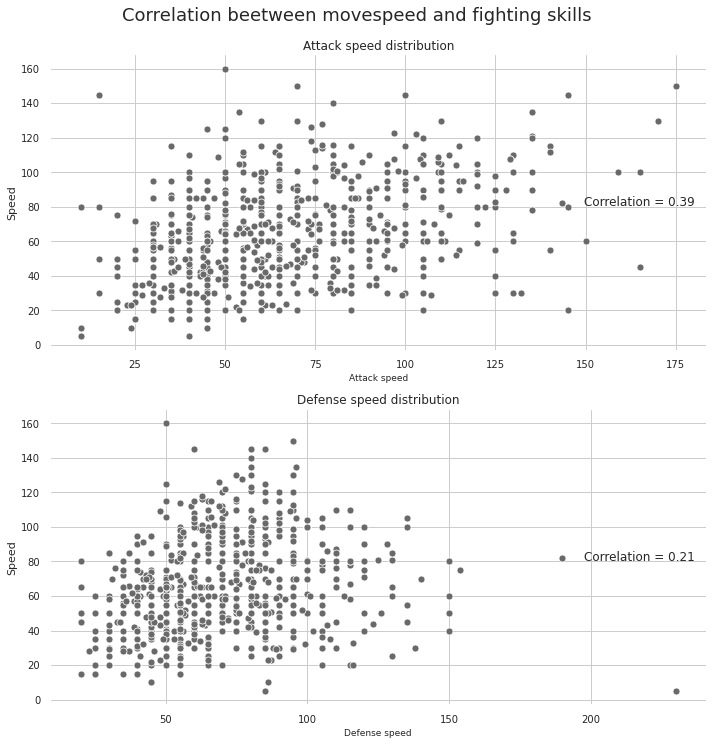

In [30]:
corr_atk = temp_speed['Sp. Atk'].corr(temp_speed['Speed'])
corr_def = temp_speed['Sp. Def'].corr(temp_speed['Speed'])

fig, axes = plt.subplots(2,1, figsize=(10,10))

sns.scatterplot(temp_speed['Sp. Atk'], temp_speed['Speed'], ax=axes[0], color='dimgrey', label='Correlation = {:.2}'.format(corr_atk))
sns.scatterplot(temp_speed['Sp. Def'], temp_speed['Speed'], ax=axes[1], color='dimgrey', label='Correlation = {:.2}'.format(corr_def))

axes[0].set_title('Attack speed distribution', size=12)
axes[1].set_title('Defense speed distribution', size=12)

axes[0].set_xlabel('Attack speed', size=9)
axes[1].set_xlabel('Defense speed', size=9)

axes[0].legend(loc="center right",prop={'size': 12})
axes[1].legend(loc="center right",prop={'size': 12})

plt.suptitle('Correlation beetween movespeed and fighting skills', size=18, y=(1.03))
plt.tight_layout()
plt.show()

Attack speed depends of moving speed, deffend speed doesn't.

#### Fight! 

Just choose two pokemons and see, who would win! Let's try to compare two different pokemon by their main stats.

In [31]:
def two_pokemon_compare(first, second):
    
    attributes = pokemons.columns.tolist()[5:11]
    
    ind_first = list(pokemons.query('Name == @first').index)[0]
    ind_second = list(pokemons.query('Name == @second').index)[0]
    
    r1 = list(pokemons[attributes].iloc[ind_first])
    last_1 = r1[0]
    r1.append(last_1)

    r2 = list(pokemons[attributes].iloc[ind_second])
    last_2 = r2[0]
    r2.append(last_2)

    title_temp = first + ' VS ' + second
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatterpolar(
        r = r1,
        theta = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        name = first,
        line_color = 'black' 
    ))

    fig.add_trace(go.Scatterpolar(
        r = r2,
        theta = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        name = second,
        line_color = 'darkgreen' 
    ))

    fig.update_traces(
        fill='none',
        line_width = 3,
        marker_size = 8)

    annotations = []
    annotations.append(dict(xref='paper', yref='paper', x=0.5, y=1.05,
                              xanchor='center', yanchor='bottom',
                              text=title_temp,
                              font=dict(family='Comic Sans MS',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
    
    fig.update_layout(
        template=None,
        polar = dict(
              radialaxis_angle = 45),
        annotations=annotations)

    fig.show()

  

In [32]:
two_pokemon_compare('Pikachu', 'Mewtwo')

Enjoy, just pick two names and match their stats.

In [33]:
#two_pokemon_compare('pokemon_1', 'pokemon_2')